LSB Tracer Run Plotting
--

*Is continuity okay?* Seems good enough, and the errors appear to be driven by 
shallow / evaporative areas, rather than missing inflows.

*Is San Jose tracer working?* Looks fine.

*Is San Mateo tracer working?* Looks okay, with some banding that might be a combination of tidal mixing (real) and anti-diffusion (artificial). 




In [16]:
import xarray as xr
import numpy as np
from stompy.grid import unstructured_grid
import matplotlib.pyplot as plt

In [1]:
%matplotlib notebook

In [2]:
ds=xr.open_dataset("/home/rusty/src/data_lsb_tracer/dwaq_map.nc")

In [4]:
g=unstructured_grid.UnstructuredGrid.read_ugrid(ds)

In [6]:
ds

<xarray.Dataset>
Dimensions:     (sub: 6, time: 49, layer: 10, face: 110783, node: 80777,
                 maxnode_per_face: 4, edge: 191582, node_per_edge: 2)
Coordinates:
  * sub         (sub) object 'continuity' 'san_jose' ... 'SURF' 'TotalDepth'
  * time        (time) datetime64[ns] 2016-06-28T14:00:00 ... 2016-06-29T14:0...
Dimensions without coordinates: layer, face, node, maxnode_per_face, edge,
                                node_per_edge
Data variables: (12/15)
    t_sec       (time) int32 ...
    continuity  (time, layer, face) float32 ...
    san_jose    (time, layer, face) float32 ...
    san_mateo   (time, layer, face) float32 ...
    LocalDepth  (time, layer, face) float32 ...
    SURF        (time, layer, face) float32 ...
    ...          ...
    node_y      (node) float64 4.197e+06 4.199e+06 ... 4.147e+06 4.147e+06
    face_node   (face, maxnode_per_face) int32 0 1 2 3 ... 46482 80774 46868 -1
    edge_node   (edge, node_per_edge) int32 0 1 1 2 ... 46868 80774 80774 46482
    bedlevel    (face) float32 -87.21 -86.68 -81.41 ... -1.215 -1.215 -1.215
    eta         (time, face) float32 ...
    sigma       (layer) float64 ...
Attributes:
    header:   DWAQ                                    n/a                    ...

<IPython.core.display.Javascript object>


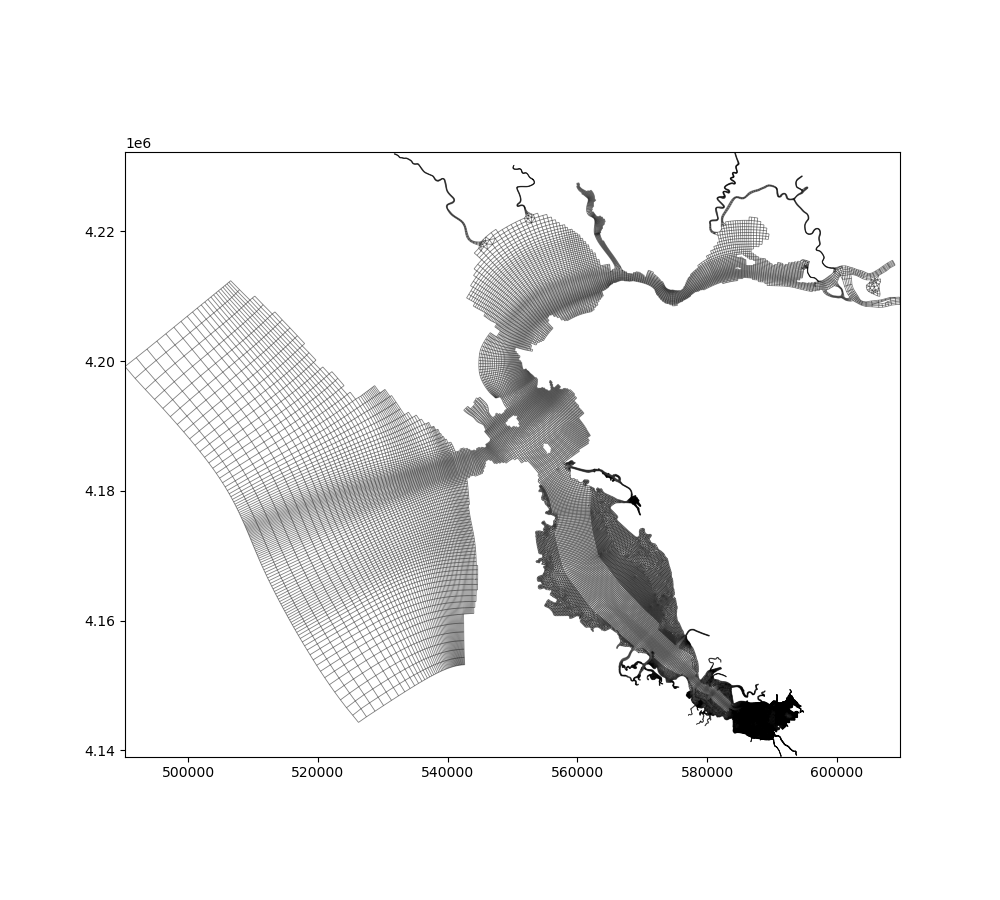

In [5]:
fig,ax=plt.subplots(figsize=(9.5,9))
ax.set_adjustable('datalim')
ax.set_position([0,0,1,1])
cax=fig.add_axes([0.85,0.5,0.02,0.4])
g.plot_edges(ax=ax,color='k',lw=0.6,alpha=0.5)

scal=ds['continuity']
ax.axis('off')

In [10]:
import six
from stompy.plot import nbviz
six.moves.reload_module(nbviz)

<module 'stompy.plot.nbviz' from '/home/rusty/src/stompy/stompy/plot/nbviz.py'>

<IPython.core.display.Javascript object>


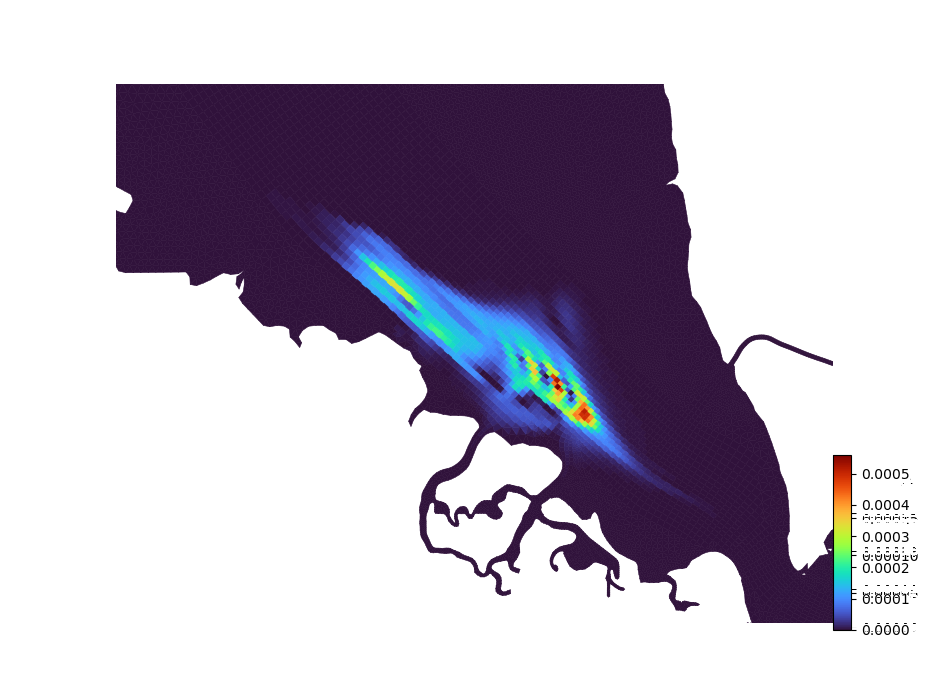

NBViz(children=(VBox(children=(Label(value='Coordinates'),), layout=Layout(grid_area='header')), Select(descri…

Will update/create coordinate pane


In [11]:
nbviz.NBViz([ds])

In [20]:
ds

<xarray.Dataset>
Dimensions:     (sub: 6, time: 49, layer: 10, face: 110783, node: 80777,
                 maxnode_per_face: 4, edge: 191582, node_per_edge: 2, xy: 2)
Coordinates:
  * sub         (sub) object 'continuity' 'san_jose' ... 'SURF' 'TotalDepth'
  * time        (time) datetime64[ns] 2016-06-28T14:00:00 ... 2016-06-29T14:0...
  * xy          (xy) int64 0 1
Dimensions without coordinates: layer, face, node, maxnode_per_face, edge,
                                node_per_edge
Data variables: (12/15)
    t_sec       (time) int32 ...
    continuity  (time, layer, face) float32 ...
    san_jose    (time, layer, face) float32 ...
    san_mateo   (time, layer, face) float32 ...
    LocalDepth  (time, layer, face) float32 ...
    SURF        (time, layer, face) float32 ...
    ...          ...
    node_y      (node) float64 4.197e+06 4.199e+06 ... 4.147e+06 4.147e+06
    face_node   (face, maxnode_per_face) int32 0 1 2 3 ... 46482 80774 46868 -1
    edge_node   (edge, node_per_edge) int32 0 1 1 2 ... 46868 80774 80774 46482
    bedlevel    (face) float32 -87.21 -86.68 -81.41 ... -1.215 -1.215 -1.215
    eta         (time, face) float32 ...
    sigma       (layer) float64 ...
Attributes:
    header:   DWAQ                                    n/a                    ...

In [21]:
continuity = ds['continuity'].isel(time=40,layer=0)
dz = ds['TotalDepth'].isel(time=40,layer=0) 

<IPython.core.display.Javascript object>


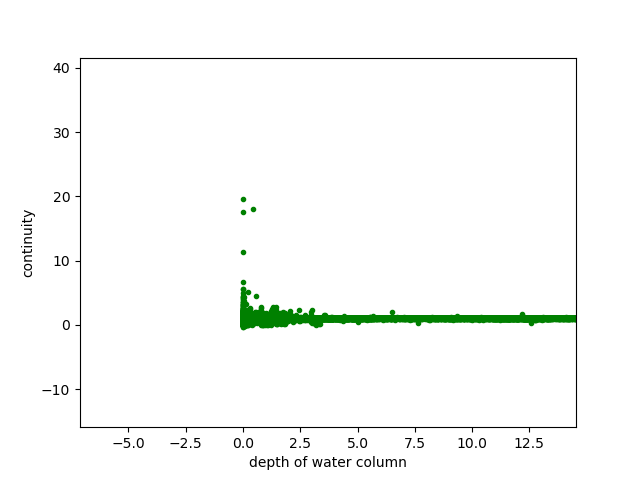

Text(0.5, 0, 'depth of water column')

In [23]:
fig,ax=plt.subplots()
ax.plot( dz, continuity, 'g.')
ax.set_ylabel('continuity')
ax.set_xlabel('depth of water column')